In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sido_list = {
'강원' : ['속초', '북춘천', '철원', '대관령', '춘천', '북강릉', '강릉', '동해', '원주', '영월', '인제', '홍천', '태백', '정선군'],
'경기' : ['동두천', '파주', '수원', '양평', '이천'],
'충북' : ['충주', '추풍령', '제천', '보은', '청주'],
'충남' : ['서산', '홍성', '보령', '부여', '금산', '천안'],
'대전' : ['대전'],
'경북' : ['울릉도', '울진', '안동', '상주', '포항', '봉화', '영주', '문경', '청송군', '영덕', '의성', '구미', '영천', '경주시'],
'경남': ['창원', '통영', '진주', '김해시', '북창원', '양산시', '의령군', '함양군', '밀양', '산청', '거제', '남해', '합천', '거창'],
'전북' : ['군산', '전주', '고창', '부안', '임실', '정읍', '남원', '장수', '고창군', '순창군', '장흥'],
'전남' : ['목포', '여수', '흑산도', '완도', '순천', '진도', '영광군', '보성군', '강진군', '해남', '고흥', '광양시', '진도군'],
'서울' : ['서울'],
'인천' : ['백령도', '인천', '강화'],
'대구' : ['대구'],
'울산' : ['울산'],
'광주' : ['광주'],
'부산' : ['부산'],
'제주' : ['제주', '고산', '성산', '서귀포']}

sido_code = {
     '42' : '강원',
     '41' : '경기',
     '43' : '충북',
     '44' : '충남',
     '30' : '대전',
     '47' : '경북',
     '48' : '경남',
     '45' : '전북',
     '46' : '전남', 
     '11' : '서울', 
     '28' : '인천',
     '27' : '대구',
     '31' : '울산',
     '29' : '광주', 
     '26' : '부산', 
     '49' : '제주',
     '36' : '세종'
}



In [3]:
def sido_func(vector):
    for i in sido_list:
        if vector in sido_list[i] :
            return i
            pass
        pass
    pass

def sido_code_func(vector2):
    for i in sido_code:
        if vector2 == sido_code[i]:
            return str(i)
            pass
        pass
    pass

In [4]:
for i in [2016,2017,2018]:
    df = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/종기상관측_ASOS_{i}.csv', encoding = 'cp949')
    df['시도'] = df['지점명'].apply(sido_func)
    
    df_mk_sejong = df[df['지점명'].str.contains('대전|청주|천안', regex=True)]
    df_mk_sejong['시도'] = df_mk_sejong['지점명'].apply(lambda x :'세종')
    df_concat = pd.concat([df,df_mk_sejong])
    df_concat['시도코드'] = df_concat['시도'].apply(sido_code_func)
    df_group = df_concat.drop(['지점','강수 계속시간(hr)', '일강수량(mm)', '일 최심신적설(cm)'], axis=1).groupby(['시도코드','일시']).mean()
    
    
    df_group.to_csv(f'C:/app/중간과제_기상데이터(2016-2018)/기상관측_{i}_Fixed.csv', encoding = 'cp949')
    pass


<ipython-input-4-a69c6ba7961c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mk_sejong['시도'] = df_mk_sejong['지점명'].apply(lambda x :'세종')


In [5]:
df_group

평균기온(°C)  최저기온(°C)  최고기온(°C)  평균 풍속(m/s)  최다풍향(16방위)  \
시도코드 일시                                                                 
11   2018-01-01    -1.300    -5.100     3.800       1.400       290.0   
     2018-01-02    -1.800    -4.300     1.800       1.800       290.0   
     2018-01-03    -4.700    -7.100    -0.400       2.200       290.0   
     2018-01-04    -4.700    -8.700    -0.700       1.400       290.0   
     2018-01-05    -3.000    -5.600     1.600       1.700       290.0   
...                   ...       ...       ...         ...         ...   
49   2018-12-27     3.575     1.350     7.475       5.925       237.5   
     2018-12-28     1.550     0.100     3.300       6.200       242.5   
     2018-12-29     2.800     0.825     4.975       5.050       105.0   
     2018-12-30     3.300     1.500     4.800       4.350       152.5   
     2018-12-31     4.750     3.050     6.625       3.775       272.5   

                 평균 현지기압(hPa)  
시도코드 일시                        
11   2018-01-01      1016.800  
     2018-01-02      1018.100  
     2018-01-03      1019.900  
     2018-01-04      1016.500  
     2018-01-05      1010.300  
...                       ...  
49   2018-12-27      1021.000  
     2018-12-28      1025.100  
     2018-12-29      1028.650  
     2018-12-30      1029.850  
     2018-12-31      1029.625  

[6205 rows x 6 columns]

In [6]:
df_2016 = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/기상관측_2016_Fixed.csv', encoding = 'cp949')
df_2017 = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/기상관측_2017_Fixed.csv', encoding = 'cp949')
df_2018 = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/기상관측_2018_Fixed.csv', encoding = 'cp949')

In [7]:
df_combine = pd.concat([df_2016, df_2017, df_2018]).sort_values(by=['시도코드','일시'])
df_combine # 2016, 2017, 2018년 일시, 시도코드로 정렬한 하루 평균 값들.

,시도코드,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),최다풍향(16방위),평균 현지기압(hPa)
0,11,2016-01-01,1.200,-3.300,4.000,1.600,90.0,1019.900
1,11,2016-01-02,5.700,1.000,9.500,2.000,320.0,1012.000
2,11,2016-01-03,6.500,5.100,9.400,1.800,320.0,1008.900
3,11,2016-01-04,2.000,-2.500,5.300,3.100,320.0,1013.100
4,11,2016-01-05,-2.700,-4.800,1.500,2.300,20.0,1016.900
...,...,...,...,...,...,...,...,...
6200,49,2018-12-27,3.575,1.350,7.475,5.925,237.5,1021.000
6201,49,2018-12-28,1.550,0.100,3.300,6.200,242.5,1025.100
6202,49,2018-12-29,2.800,0.825,4.975,5.050,105.0,1028.650
6203,49,2018-12-30,3.300,1.500,4.800,4.350,152.5,1029.850


시도코드         11    26   27        28   29   30   31        36    41        42  \
일시                                                                              
2016-01-01  1.2   5.3  1.7  3.133333  3.2  1.6  4.0  1.633333 -0.30  0.530769   
2016-01-02  5.7   8.1  3.0  7.100000  6.5  6.6  5.6  6.233333  4.60  5.176923   
2016-01-03  6.5  11.4  4.9  5.366667  7.3  6.9  7.0  6.333333  4.40  4.915385   
2016-01-04  2.0  10.4  5.8  1.433333  6.4  5.1  7.7  4.466667  2.76  3.946154   
2016-01-05 -2.7   5.3  2.9 -1.833333  2.4 -0.6  3.9 -0.700000 -1.94 -1.069231   
...         ...   ...  ...       ...  ...  ...  ...       ...   ...       ...   
2016-12-27 -2.3   4.3  2.8 -2.333333  2.3  0.3  3.5 -0.033333 -1.26 -0.800000   
2016-12-28 -3.7   3.7  0.3 -3.066667 -0.1 -2.5  2.0 -2.866667 -4.00 -3.164286   
2016-12-29 -4.2   2.5  0.3 -3.233333 -0.4 -2.3  1.3 -2.866667 -3.78 -3.150000   
2016-12-30 -3.9   2.4  0.8 -1.733333  0.3 -1.8  0.9 -2.466667 -4.54 -3.221429   
2016-12-31  0.7   4.7  2.3  

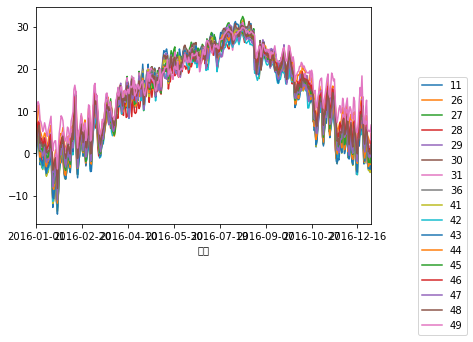

In [253]:
df_2016_pivot = df_2016.pivot_table(values='평균기온(°C)', columns = '시도코드', index='일시') ## 2016년 시도별 데이터.
print(df_2016_pivot)
df_2016_pivot.plot()
plt.legend(bbox_to_anchor=(0.8, 0., 0.5, 0.7))

In [254]:
df_combine_pivot = df_combine.pivot_table(values='평균기온(°C)', columns = '시도코드',index='일시')
print(df_combine_pivot)

시도코드          11    26   27        28   29   30   31        36     41  \
일시                                                                      
2016-01-01   1.2   5.3  1.7  3.133333  3.2  1.6  4.0  1.633333  -0.30   
2016-01-02   5.7   8.1  3.0  7.100000  6.5  6.6  5.6  6.233333   4.60   
2016-01-03   6.5  11.4  4.9  5.366667  7.3  6.9  7.0  6.333333   4.40   
2016-01-04   2.0  10.4  5.8  1.433333  6.4  5.1  7.7  4.466667   2.76   
2016-01-05  -2.7   5.3  2.9 -1.833333  2.4 -0.6  3.9 -0.700000  -1.94   
...          ...   ...  ...       ...  ...  ...  ...       ...    ...   
2018-12-27 -10.1   0.5 -3.3 -9.100000 -3.2 -5.9 -1.6 -6.933333  -9.48   
2018-12-28 -10.5  -3.5 -5.7 -8.600000 -4.9 -8.6 -4.4 -9.333333 -10.84   
2018-12-29  -7.6  -2.2 -4.2 -6.133333 -3.3 -6.1 -3.1 -6.233333  -7.62   
2018-12-30  -6.8  -0.7 -3.6 -6.233333 -2.4 -5.4 -1.8 -6.133333  -8.62   
2018-12-31  -5.4   3.9 -1.3 -4.700000 -1.8 -4.7  2.2 -5.466667  -7.38   

시도코드              42     43        44        45   

In [9]:
df_dust_2016 = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/미세먼지/2016년.csv', encoding = 'cp949')
df_dust_2017 = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/미세먼지/2017년.csv', encoding = 'cp949')
df_dust_2018 = pd.read_csv(f'C:/app/중간과제_기상데이터(2016-2018)/미세먼지/2018년.csv', encoding = 'cp949')

df_combine_dust = pd.concat([df_dust_2016,df_dust_2017,df_dust_2018])
df_combine_dust['시도코드'] = (df_combine_dust['시도'].apply(sido_code_func))
df_sort = df_combine_dust.sort_values(by=['시도코드', '일시'])
df_sort_1 = df_sort.drop(['시도'], axis = 1) 
# df_concat.drop(['지점','강수 계속시간(hr)', '일강수량(mm)', '일 최심신적설(cm)'], axis=1)

In [10]:
df_sort_1

,일시,SO2,CO,O3,NO2,PM10,PM25,시도코드
2928,20160101,0.006083,0.978070,0.005173,0.049218,69.979753,43.506066,11
2929,20160102,0.006103,0.737061,0.008489,0.046206,53.582955,30.946644,11
2930,20160103,0.007364,0.956498,0.012011,0.051611,98.532391,57.752122,11
2931,20160104,0.006257,0.640290,0.022641,0.029584,78.656682,46.871134,11
2932,20160105,0.006105,0.466703,0.014786,0.029283,33.758734,16.394604,11
...,...,...,...,...,...,...,...,...
5470,20181227,0.001642,0.247143,0.037076,0.005798,20.991597,11.641221,49
5471,20181228,0.001083,0.240000,0.036569,0.004472,12.689076,10.712230,49
5472,20181229,0.001208,0.277143,0.036500,0.005142,15.000000,9.787234,49
5473,20181230,0.001200,0.267143,0.036090,0.005373,14.218487,10.427536,49


In [19]:
import re
def com(vec):
    result = re.compile('(\d{4})[-](\d{2})[-](\d{2})').sub('\g<1>\g<2>\g<3>', vec)
    return result

In [25]:
df_combine.info()
df_combine['일시'] = df_combine.일시.apply(com).astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18632 entries, 0 to 6204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도코드          18632 non-null  int64  
 1   일시            18632 non-null  object 
 2   평균기온(°C)      18631 non-null  float64
 3   최저기온(°C)      18632 non-null  float64
 4   최고기온(°C)      18631 non-null  float64
 5   평균 풍속(m/s)    18629 non-null  float64
 6   최다풍향(16방위)    18629 non-null  float64
 7   평균 현지기압(hPa)  18631 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [26]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18632 entries, 0 to 6204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도코드          18632 non-null  int64  
 1   일시            18632 non-null  int64  
 2   평균기온(°C)      18631 non-null  float64
 3   최저기온(°C)      18632 non-null  float64
 4   최고기온(°C)      18631 non-null  float64
 5   평균 풍속(m/s)    18629 non-null  float64
 6   최다풍향(16방위)    18629 non-null  float64
 7   평균 현지기압(hPa)  18631 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.3 MB


In [15]:
df_sort_1['시도코드']=df_sort_1['시도코드'].astype('int64')
df_sort_1['일시']=df_sort_1['일시'].astype('int64')

In [27]:
df_sort_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18632 entries, 2928 to 5474
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      18632 non-null  int64  
 1   SO2     18632 non-null  float64
 2   CO      18632 non-null  float64
 3   O3      18632 non-null  float64
 4   NO2     18632 non-null  float64
 5   PM10    18632 non-null  float64
 6   PM25    18510 non-null  float64
 7   시도코드    18632 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.3 MB


In [28]:
df_sort_12 = df_sort_1.groupby(['시도코드', '일시']).mean()

In [29]:
print(df_sort_12)

                    SO2        CO        O3       NO2       PM10       PM25
시도코드 일시                                                                    
11   20160101  0.006083  0.978070  0.005173  0.049218  69.979753  43.506066
     20160102  0.006103  0.737061  0.008489  0.046206  53.582955  30.946644
     20160103  0.007364  0.956498  0.012011  0.051611  98.532391  57.752122
     20160104  0.006257  0.640290  0.022641  0.029584  78.656682  46.871134
     20160105  0.006105  0.466703  0.014786  0.029283  33.758734  16.394604
...                 ...       ...       ...       ...        ...        ...
49   20181227  0.001642  0.247143  0.037076  0.005798  20.991597  11.641221
     20181228  0.001083  0.240000  0.036569  0.004472  12.689076  10.712230
     20181229  0.001208  0.277143  0.036500  0.005142  15.000000   9.787234
     20181230  0.001200  0.267143  0.036090  0.005373  14.218487  10.427536
     20181231  0.001752  0.308029  0.035128  0.008563  18.689076  12.507042

[18632 rows

In [33]:
df_com = df_combine.merge(df_sort_12, left_on=['시도코드', '일시'], right_on=['시도코드', '일시'])

In [34]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18632 entries, 0 to 18631
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도코드          18632 non-null  int64  
 1   일시            18632 non-null  int64  
 2   평균기온(°C)      18631 non-null  float64
 3   최저기온(°C)      18632 non-null  float64
 4   최고기온(°C)      18631 non-null  float64
 5   평균 풍속(m/s)    18629 non-null  float64
 6   최다풍향(16방위)    18629 non-null  float64
 7   평균 현지기압(hPa)  18631 non-null  float64
 8   SO2           18632 non-null  float64
 9   CO            18632 non-null  float64
 10  O3            18632 non-null  float64
 11  NO2           18632 non-null  float64
 12  PM10          18632 non-null  float64
 13  PM25          18510 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 2.1 MB


In [35]:
df_com.to_csv('C:/app/중간과제_기상데이터(2016-2018)/미세먼지+기상관측.csv')